In [1]:
import shap
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'./data/census.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   fnlgt           32561 non-null  int64 
 4   education       32561 non-null  object
 5   education-num   32561 non-null  int64 
 6   marital-status  32561 non-null  object
 7   occupation      32561 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital-gain    32561 non-null  int64 
 12  capital-loss    32561 non-null  int64 
 13  hours-per-week  32561 non-null  int64 
 14  native-country  32561 non-null  object
 15  salary          32561 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [4]:
df.head()

,Unnamed: 0,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [54]:
df.shape

(32561, 15)

In [9]:
df[['education',"marital-status"]].values.shape

(32561, 2)

In [55]:
df.isnull().sum()

age                0
 workclass         0
 fnlgt             0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 salary            0
dtype: int64

In [56]:
df.describe()

,age,fnlgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [57]:
cat_columns = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country'
]

quant_columns = [
    'age',
    'fnlgt',
    'capital-gain',
    'capital-loss',
    'hours-per-week'
]

In [58]:
df.columns = df.columns.str.replace(' ','')

In [61]:
df.columns.values

array(['age', 'workclass', 'fnlgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'], dtype=object)

In [63]:
df.isnull().sum()

age               0
workclass         0
fnlgt             0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [72]:
# remove spaces of salary column
df['salary'] = df['salary'].apply(lambda s: s.strip())

# remove spaces of values of categorical columns
for col in cat_columns:
    df[col] = df[col].apply(lambda s: s.strip())

col_salary = df['salary'].apply(lambda val: 0 if val == "<=50K" else 1)

<AxesSubplot:>

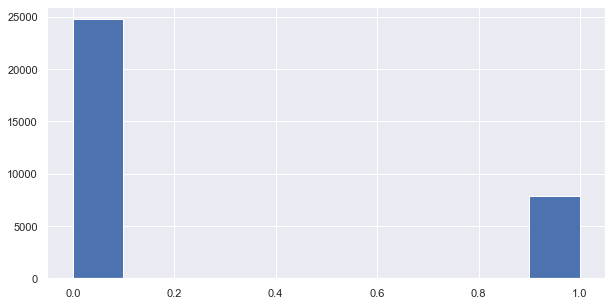

In [95]:
plt.figure(figsize=(10,5)) 
col_salary.hist()

In [94]:
# Check num of categories of each cat variable:
for col in cat_columns:
    print(col)
    print(df[col].value_counts())
    print("\n")

# One category name in workclass is missing, replace it
df['workclass'] = df['workclass'].apply(lambda s: 'Others' if s == '?' else s)
print(df['workclass'].value_counts())
# One category name in occupation is missing, replace it
df['occupation'] = df['occupation'].apply(lambda s: 'Others_occ' if s == '?' else s)
print(df['occupation'].value_counts())
# One category name in native-country is missing, replace it with Others
df['native-country'] = df['native-country'].apply(lambda s: 'Others_cnt' if s == '?' else s)
print(df['native-country'].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Others               1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64


occupation
Prof-specialty       4140
Craft-repair         409

In [96]:
df.to_csv(r'./data/preprocessed_census.csv')